<a href="https://colab.research.google.com/github/tacoma051/JTive/blob/main/Nodexl_BTS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Matplotlib에 한글 폴트 설정:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 33.4 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 11.95 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-02-24 06:09:51--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response

**### Clauset-Newman-Moore**

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


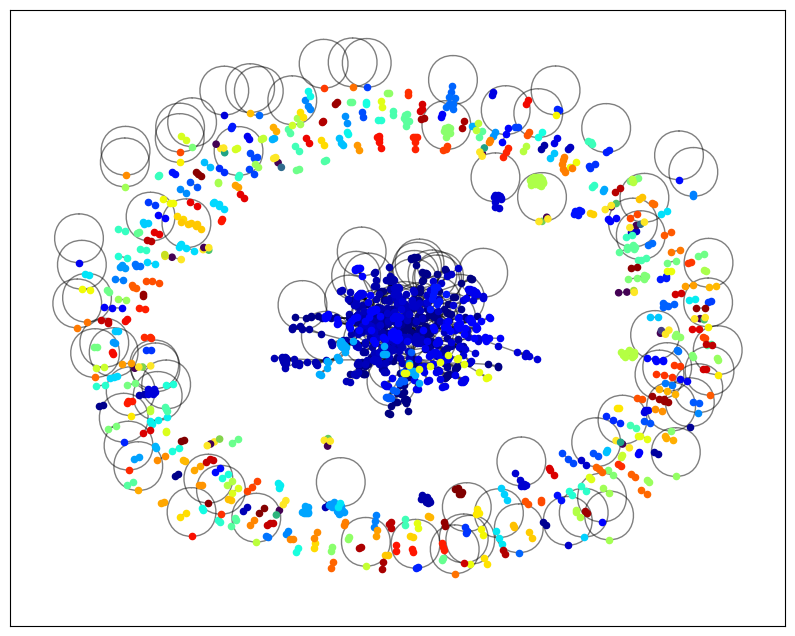

Node: 가인, 2AM(조권), Community: 0
Node: 김이나, Community: 0
Node: 이승기, Community: 1
Node: 김도훈, 이상호, 김기범, Community: 1
Node: 거미, Community: 2
Node: 최갑원, Community: 3
Node: 티아라(T-ara), Community: 1
Node: 신사동호랭이, 최규성, Community: 23
Node: 지아(Zia), Community: 3
Node: 원태연, 최은하, Community: 3
Node: 애프터스쿨(AfterSchool), Community: 19
Node: 용감한형제, Community: 23
Node: 윤하(YOUNHA), Community: 0
Node: 박화요비, Community: 0
Node: 쥬얼리(Jewelry), Community: 6
Node: 안영민, Community: 6
Node: 길미, Community: 7
Node: 서정진, Community: 7
Node: 방시혁, Community: 1
Node: 현아(HyunA), Community: 23
Node: 신사동호랭이, 휴우(HUU), Community: 23
Node: 김우주, Community: 8
Node: 김남길, Community: 9
Node: 조은희, Community: 9
Node: 포맨(4MEN), Community: 10
Node: 이치우, Community: 10
Node: 나윤권, 아이유, Community: 11
Node: 심현보, 김윤희, Community: 11
Node: 씨엔블루(CNBLUE), Community: 3
Node: 한성호, 에이맨, Community: 3
Node: 씨야(SeeYa), 다비치, 티아라, Community: 12
Node: K-Smith, Community: 12
Node: 임재범, Community: 13
Node: 김종천, Community: 13
Node: 2AM, Community: 1
Node: 

In [2]:
# 필요한 라이브러리 설치
!pip install pandas matplotlib networkx python-louvain openpyxl

# 라이브러리 임포트
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# 엑셀 파일 로드
df = pd.read_excel('/content/drive/MyDrive/result/10percent_data.xlsx')

# 네트워크 생성
G = nx.Graph()

# 노드 추가 (singer.t와 lyricist.t 변인을 기반으로)
for idx, row in df.iterrows():
    singer = row['singer.t']
    lyricist = row['lyricist.t']

    if pd.notna(singer) and pd.notna(lyricist):
        G.add_edge(singer, lyricist)  # 가수와 작사가 사이에 엣지 추가

# Clauset-Newman-Moore 커뮤니티 탐지 알고리즘 적용
partition = community_louvain.best_partition(G)

# 네트워크와 커뮤니티 시각화
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(10, 8))

# 커뮤니티별로 노드 색상 지정
for comm in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == comm]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=20, node_color=plt.cm.jet(comm / max(partition.values())))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# 각 노드의 커뮤니티 출력 (예시)
for node, comm in partition.items():
    print(f'Node: {node}, Community: {comm}')

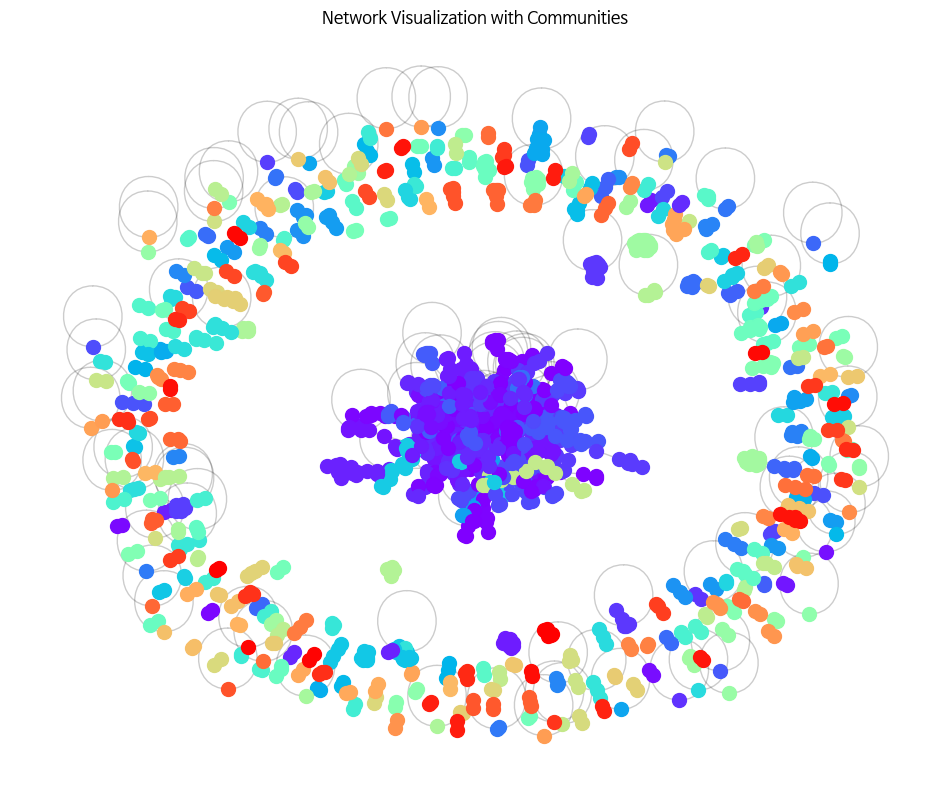

Community 0: ['가인, 2AM(조권)', '김이나', '윤하(YOUNHA)', '박화요비', '나나(Nana)', '박화요비, FRAKTAL', '아이유(IU), 2AM(슬옹)', '나르샤(Narsha)', '아이유(IU)', 'G.고릴라', '토이', '유희열', '써니힐(SunnyHill)', 'BrianKim', '김연아, 아이유(IU)', "D'Day", '브라운아이드걸스', '김이나, 미료', '박창학', '아이유(IU), 이적', 'G.고릴라, 아이유(IU)', '아이유(IU), 라디(Ra.D)', '양요섭, 정은지', '신화', '신화(이민우)', '나얼', '프라이머리, 다이나믹듀오(최자), 미료', '빅스(VIXX)', 'HIGH4, 아이유(IU)', '조덕배', '김한영', 'Tablo', 'NELL(김종완)', '토이(Toy), 성시경', '정승환', '최은하', '1월8일', '윤성희, 라비(RAVI)', '이유갓지(GODG)않은이유(박명수), 이유갓지(GODG)않은이유(아이유)', '아이유(IU), 이종훈', 'Misfit, 라비(RAVI)', '수지(Suzy), 백현(BAEKHYUN)', '김미진', '젝스키스', '김미진, 라비(RAVI)', '장대성', '샘김(SamKim)', '남혜승, 박진호', '아이유(IU), 김이나', '선우정아, 아이유(IU)', '이병우', '김창환, 박광현', 'GODOK, 강욱진', '이상은(=Lee-tzsche)', '아이유(IU), 방탄소년단(SUGA)', "원더키드(Wonderkid), MelanieFontana, Michel'Lindgren'Schulz, 'Hitman'Bang, 라라라스튜디오(danke), 이스란, 탐쓴(TOMSSON), 송재경", '유희열, 김이나', '아이유(IU), Deanfluenza']
Community 1: ['이승기', '김도훈, 이상호, 김기범', '티아라(T-ara)', '방시혁', '2AM', '방시혁, 백찬', '휘성(Realslow)', '방시

In [3]:
# numpy 임포트 확인
import numpy as np
import matplotlib.cm as cm

# 네트워크와 커뮤니티 시각화
plt.figure(figsize=(12, 10))
plt.title('Network Visualization with Communities')

# 커뮤니티별로 노드 색상 지정
community_colors = cm.rainbow(np.linspace(0, 1, len(set(partition.values()))))
community_map = {comm: community_colors[i] for i, comm in enumerate(set(partition.values()))}

# 노드 그리기
for node, comm in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100, node_color=[community_map[comm]])

# 엣지 그리기
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.axis('off')  # 축 제거
plt.show()

# 커뮤니티 정보 출력
for comm in set(partition.values()):
    print(f"Community {comm}: {[node for node in partition if partition[node] == comm]}")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 201 (\N{LATIN CAPITAL LETTER E WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


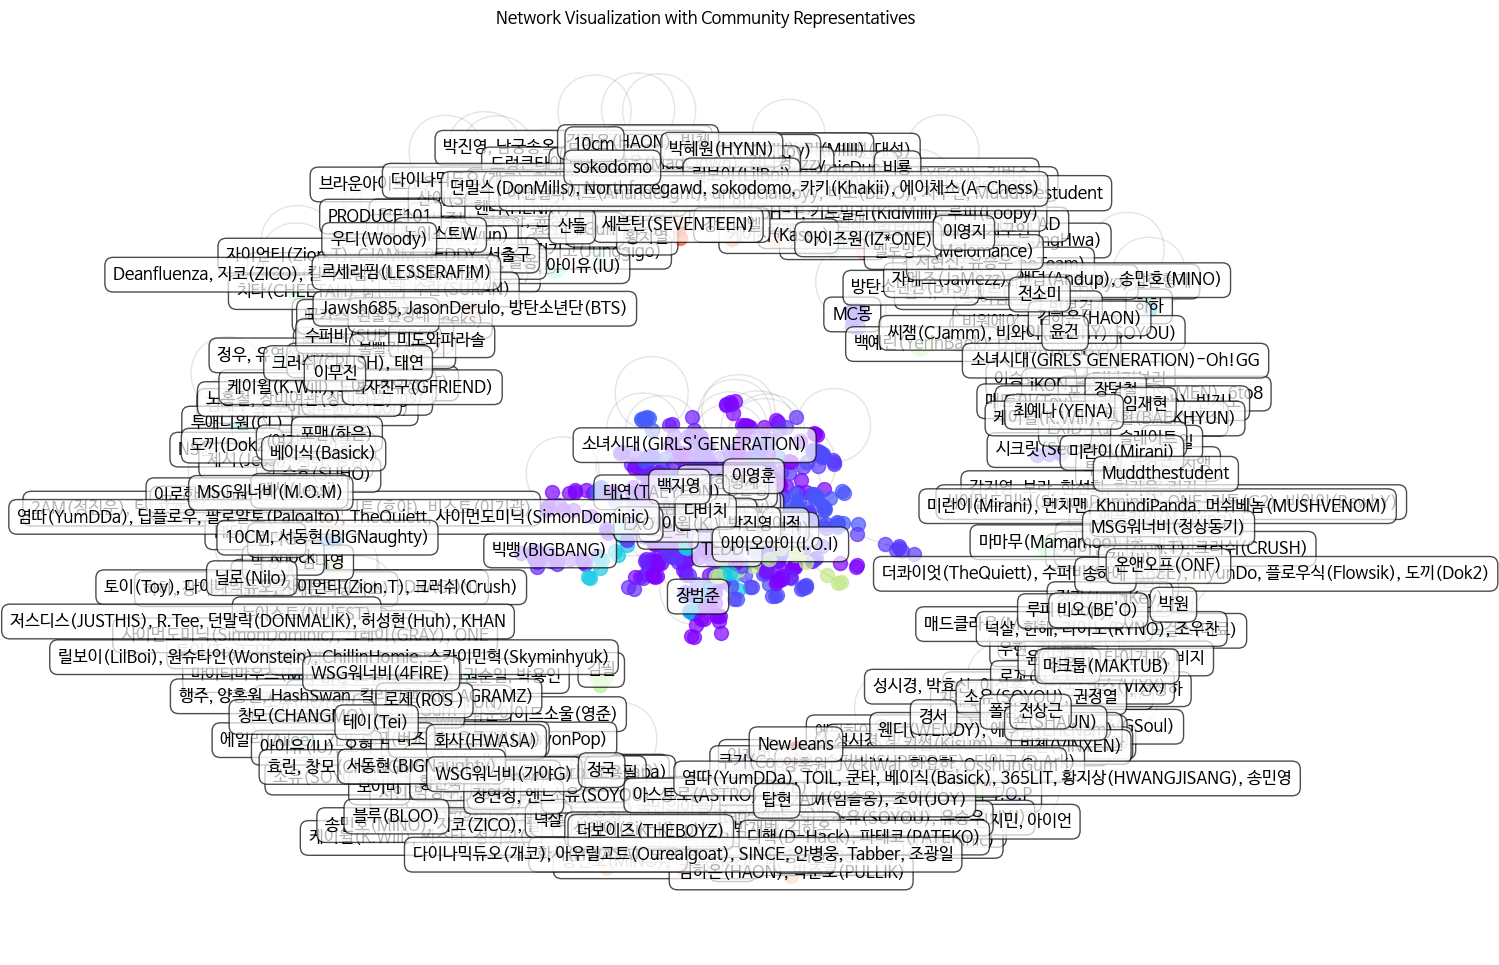

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
import numpy as np

# 파티션과 네트워크 G가 이미 정의되어 있다고 가정

# 연결 중심성 계산
centrality = nx.degree_centrality(G)

# 각 커뮤니티의 대표 노드 (연결 중심성이 가장 높은 노드) 선택
representative_nodes = {}
for node, comm in partition.items():
    if comm not in representative_nodes:
        representative_nodes[comm] = (node, centrality[node])
    else:
        if centrality[node] > representative_nodes[comm][1]:
            representative_nodes[comm] = (node, centrality[node])

# 커뮤니티별로 노드 색상 지정
community_colors = cm.rainbow(np.linspace(0, 1, len(set(partition.values()))))
community_map = {comm: community_colors[i] for i, comm in enumerate(set(partition.values()))}

plt.figure(figsize=(15, 12))

# 모든 노드와 엣지 그리기 (연결 중심성에 따라 노드 크기 조정)
nx.draw_networkx_edges(G, pos, alpha=0.1)
for node, comm in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=(centrality[node] + 0.1) * 1000, node_color=[community_map[comm]], alpha=0.7)

# 대표 노드(가수) 이름 표시
for comm, (node, _) in representative_nodes.items():
    plt.text(pos[node][0], pos[node][1], s=node, horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.axis('off')
plt.title("Network Visualization with Community Representatives")
plt.show()

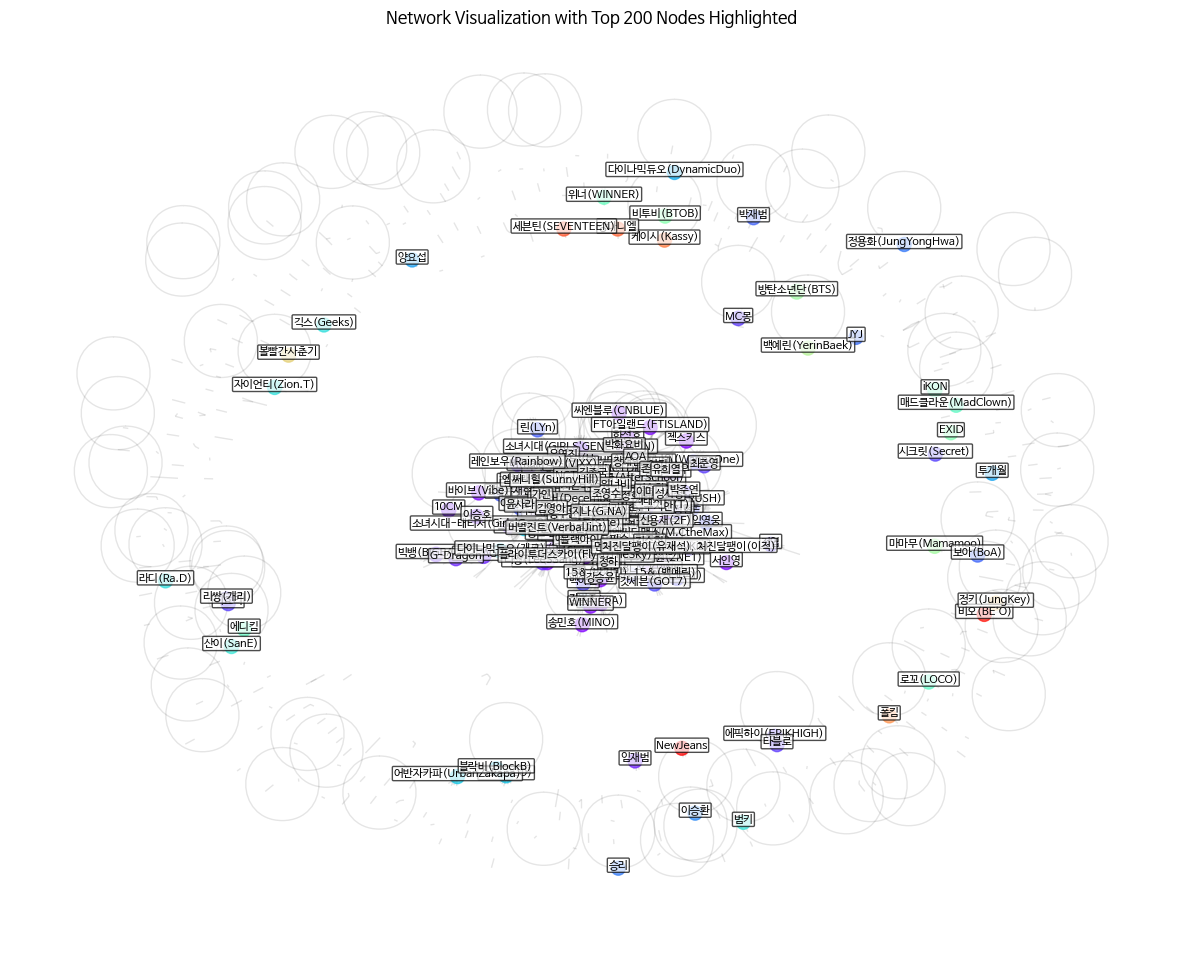

In [14]:
# 연결 중심성이 가장 높은 상위 200명의 노드 선택
top_200_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:200]
top_200_nodes_dict = {node: centrality for node, centrality in top_200_nodes}

# 네트워크 시각화 설정
plt.figure(figsize=(15, 12))

# 모든 노드와 엣지 그리기
nx.draw_networkx_edges(G, pos, alpha=0.1)

# 상위 200명의 노드만 크기와 색상을 조정하여 그리기
nx.draw_networkx_nodes(G, pos, nodelist=top_200_nodes_dict.keys(),
                       node_size=[(centrality[node]+0.1)*1000 for node in top_200_nodes_dict.keys()],
                       node_color=[community_map[partition[node]] for node in top_200_nodes_dict.keys()], alpha=0.7)

# 상위 200명의 노드 이름 표시
for node, _ in top_200_nodes:
    plt.text(pos[node][0], pos[node][1], s=node, horizontalalignment='center', fontsize=8,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))

plt.axis('off')
plt.title("Network Visualization with Top 200 Nodes Highlighted")
plt.show()


**### 위 코드에서 중심 10명만**

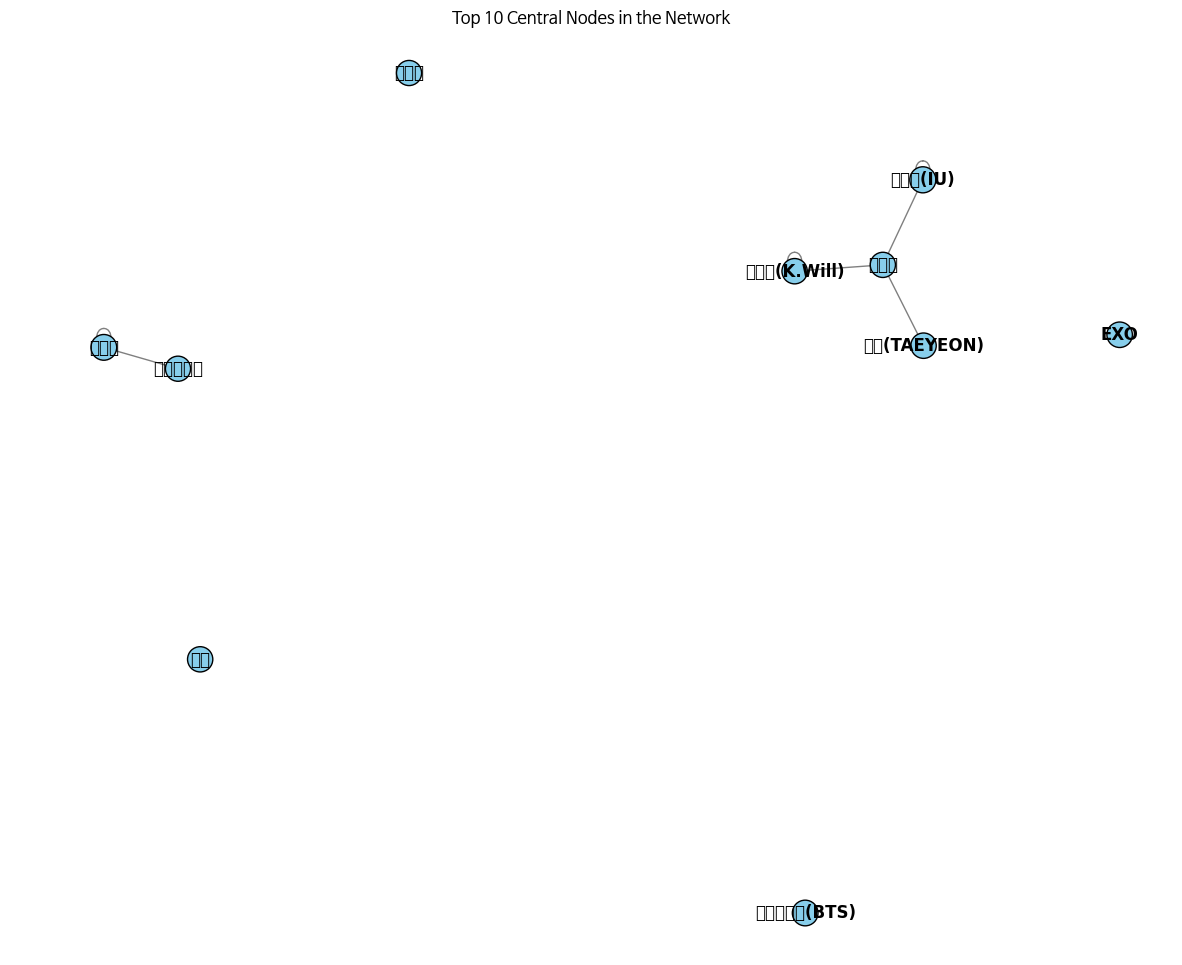

In [6]:
# 연결 중심성이 가장 높은 10개의 노드 선택
top_10_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# 네트워크 시각화 설정
plt.figure(figsize=(15, 12))
plt.title("Top 10 Central Nodes in the Network")

# 상위 10개 노드와 그들의 엣지만 그리기
top_10_nodes_dict = {node[0]: centrality[node[0]] for node in top_10_nodes}
subG = G.subgraph(top_10_nodes_dict.keys())

# 위치 계산
pos_subG = nx.spring_layout(subG)

# 엣지 그리기
nx.draw_networkx_edges(subG, pos_subG, alpha=0.5)

# 노드 그리기 (연결 중심성에 따라 노드 크기 조정)
nx.draw_networkx_nodes(subG, pos_subG, node_size=[(centrality[node]+0.1)*3000 for node in subG.nodes()], node_color='skyblue', edgecolors='black')

# 노드 레이블 추가
nx.draw_networkx_labels(subG, pos_subG, font_size=12, font_weight='bold')

plt.axis('off')
plt.show()

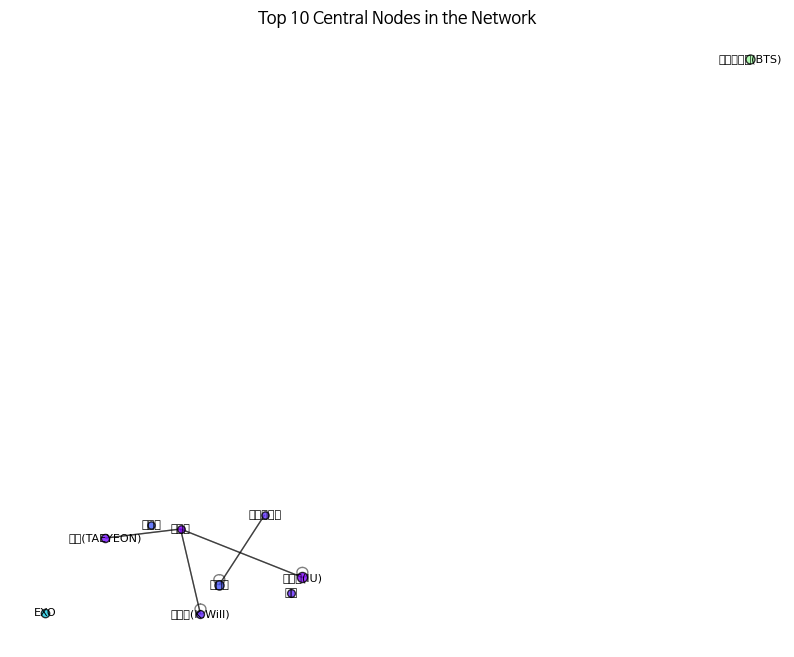

In [7]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import numpy as np
from community import community_louvain

# 연결 중심성이 가장 높은 10명의 가수 선택
top_10_central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# 상위 10명의 가수와 그들의 연결 중심성을 각각 추출
top_10_nodes = [node[0] for node in top_10_central_nodes]
top_10_centrality_values = [node[1] for node in top_10_central_nodes]

# 네트워크 시각화 설정
plt.figure(figsize=(10, 8))

# 상위 10명의 가수 노드와 그 연결을 그리기
for node in top_10_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=top_10_centrality_values[top_10_nodes.index(node)] * 3000,
                           node_color=[community_map[partition[node]]], alpha=0.8, edgecolors='black')
    nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=8)

# 상위 10명의 가수 노드 사이의 엣지 그리기
edges_to_draw = [(node1, node2) for node1 in top_10_nodes for node2 in top_10_nodes if G.has_edge(node1, node2)]
nx.draw_networkx_edges(G, pos, edgelist=edges_to_draw, alpha=0.5)

plt.axis('off')
plt.title("Top 10 Central Nodes in the Network")
plt.show()


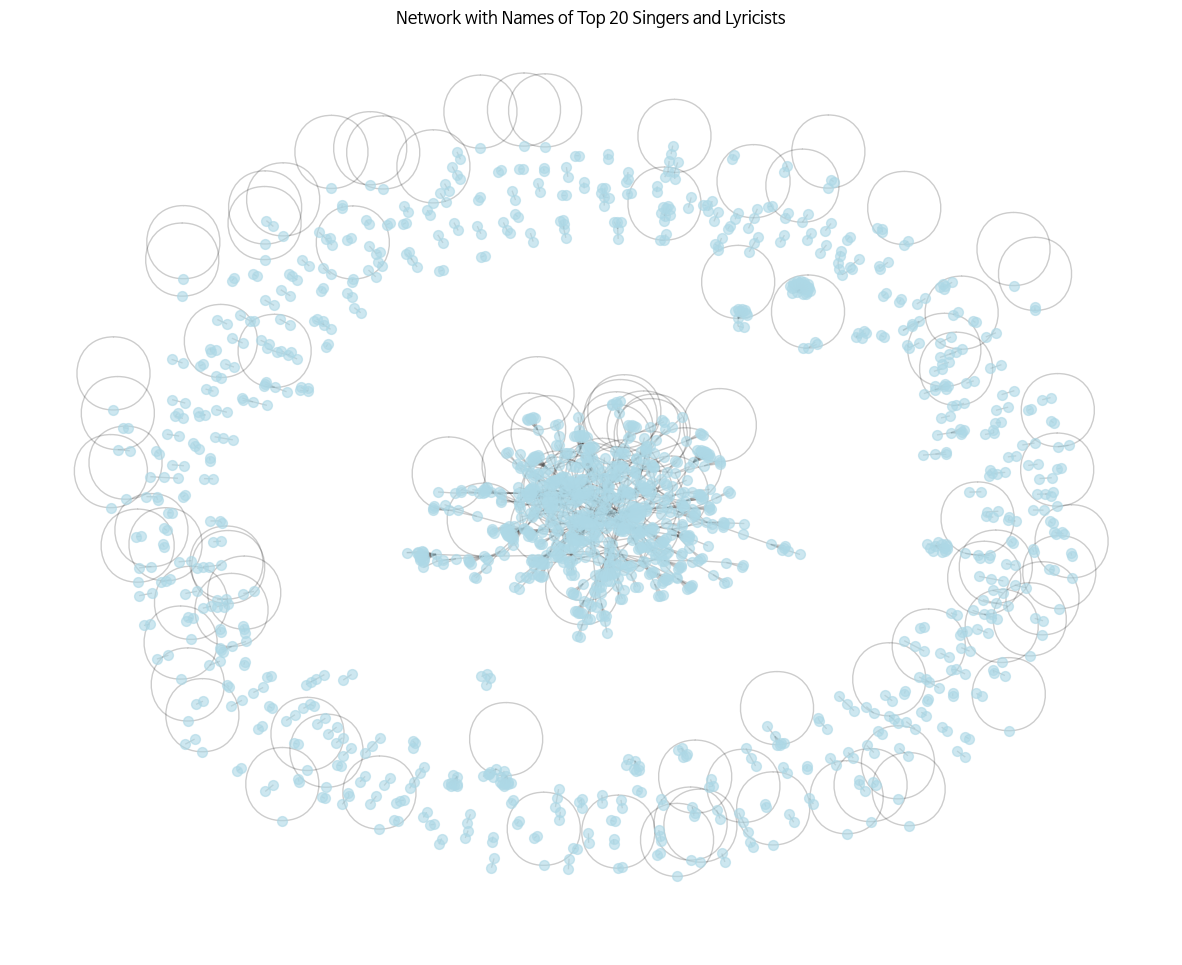

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# 연결 중심성이 가장 높은 상위 20명의 가수와 작사가를 식별 (여기서는 centrality, singers, lyricists가 이미 정의되어 있다고 가정)
top_200_singers = sorted(singers, key=lambda x: centrality[x], reverse=True)[:200]
top_200_lyricists = sorted(lyricists, key=lambda x: centrality[x], reverse=True)[:200]

# 전체 네트워크 시각화
plt.figure(figsize=(15, 12))
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue', alpha=0.6)

# 상위 20명의 가수와 작사가 이름 표기
for node in top_200_singers + top_200_lyricists:
    x, y = pos[node]
    plt.text(x, y+0.02, s=node, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round'), horizontalalignment='center', fontsize=8)

plt.axis('off')
plt.title("Network with Names of Top 20 Singers and Lyricists")
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

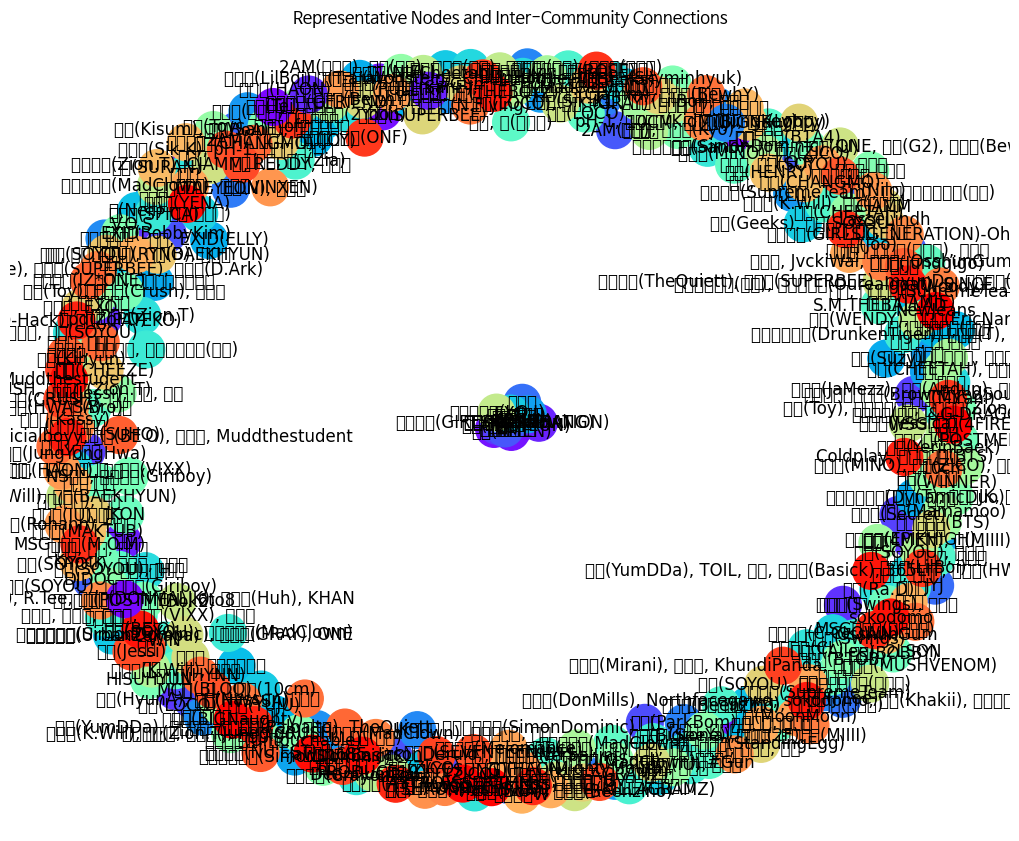

In [5]:
# 커뮤니티 대표 노드 간 연결 그래프 생성
G_representative = nx.Graph()

# 각 커뮤니티 대표 노드 추가
for comm, (node, _) in representative_nodes.items():
    G_representative.add_node(node, community=comm)

# 원래 네트워크 G의 엣지를 순회하며, 두 노드가 서로 다른 커뮤니티에 속할 경우 대표 노드 간 연결 추가
for edge in G.edges():
    node1, node2 = edge
    comm1, comm2 = partition[node1], partition[node2]
    if comm1 != comm2:  # 서로 다른 커뮤니티에 속하는 경우
        rep_node1 = representative_nodes[comm1][0]
        rep_node2 = representative_nodes[comm2][0]
        G_representative.add_edge(rep_node1, rep_node2)

# 대표 노드 간 연결 그래프 시각화
pos_rep = nx.spring_layout(G_representative)  # 대표 노드 위치
plt.figure(figsize=(10, 8))
nx.draw(G_representative, pos_rep, with_labels=True, node_color=[community_map[G_representative.nodes[node]['community']] for node in G_representative], node_size=700, font_size=12, edge_color='gray')
plt.title("Representative Nodes and Inter-Community Connections")
plt.show()